In [1]:
import os
import glob
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import dclab
from tqdm.notebook import tqdm

sns.set_style('darkgrid')
sns.set_context('paper', font_scale=1)

In [2]:
print("numpy v{}".format(np.__version__))
import matplotlib
print("matplotlib v{}".format(matplotlib.__version__))
print("pandas v{}".format(pd.__version__))
print("seaborn v{}".format(sns.__version__))
print("dclab v{}".format(dclab.__version__))

numpy v1.26.2
matplotlib v3.8.1
pandas v2.1.3
seaborn v0.13.0
dclab v0.55.6


Versions 20231203:
```
numpy v1.26.2
matplotlib v3.8.1
pandas v2.1.3
seaborn v0.13.0
dclab v0.55.6
```

In [3]:
def get_dataframe(rtdc_folder, region='channel'):
    rtdc_files = glob.glob(os.path.join(rtdc_folder, "*.rtdc"))
    df_out = pd.DataFrame()
    for rtdc_file in tqdm(rtdc_files):
        ds = dclab.new_dataset(rtdc_file)

        if ds.config['setup']['chip region'] == region:
            ds.config['calculation']['emodulus lut'] = 'HE-3D-FEM-22'
            ds.config["calculation"]["emodulus medium"] = ds.config["setup"]["medium"]
            ds.config["calculation"]["emodulus temperature"] = 25.0
            ds.config["calculation"]["emodulus viscosity model"] = 'buyukurganci-2022'

            ds.config['filtering']['area_ratio min'] = 1
            ds.config['filtering']['area_ratio max'] = 1.05
            ds.apply_filter()

            ds = dclab.new_dataset(ds)

            df = pd.DataFrame()
            for feat in ds.features_scalar:
                df[feat] = ds[feat][:]

            df['flow_rate'] = np.round(ds.config['setup']['flow rate'], 3)
            df_out = pd.concat([df_out, df])
    df_out.reset_index(inplace=True)
    return df_out

def fsize_cm(size_x, size_y):
    """
    
    :param size_x: Figure width in inch
    :param size_y: Figure height in inch
    :return: tuple(width, height) in cm
    """
    return size_x / 2.54, size_y / 2.54

In [4]:
data_repository = "..\\data\\rtdc"

In [5]:
# df_ch = pd.DataFrame()
# for rtdc_folder in os.listdir(data_repository):
#     path = os.path.join(data_repository, rtdc_folder)
#     if os.path.isdir(path):
#         print(f"{rtdc_folder}: ")
#         df_sample = get_dataframe(path, region='channel')
#         df_sample['radius'] = (3 * df_sample['volume'] / (4 * np.pi))**(1/3)
#         df_sample['sample'] = rtdc_folder
#         df_ch = pd.concat([df_ch, df_sample])
# df_ch.reset_index(inplace=True, drop=True)
# df_ch['radius'] = (3 * df_ch['volume'] / (4 * np.pi))**(1/3)

Export dataframe to tsv

In [6]:
save_path = os.path.join(data_repository, "channel_data_all.tsv")

In [7]:
# df_ch.to_csv(save_path, sep='\t')

Read data from csv

In [8]:
df_ch = pd.read_csv(save_path, sep='\t', index_col=0)

In [9]:
df_ch

level_0  area_msd  area_ratio    area_um    aspect  bright_avg  \
0            0    1046.0    1.019599  122.56323  1.027027   135.29936   
1            1    1069.0    1.033209  126.93023  1.108108   135.46045   
2            2    1102.5    1.021769  129.45850  1.026316   135.33449   
3            3    1135.0    1.022026  133.30835  1.052632   135.14694   
4            4    1018.5    1.032401  120.83942  1.027027   136.62221   
...        ...       ...         ...        ...       ...         ...   
59434     2876    1266.5    1.027635  149.56967  1.075000   139.13197   
59435     2877    1360.0    1.027574  160.60208  1.073171   138.83403   
59436     2878    1374.0    1.040757  164.33702  1.175000   139.55833   
59437     2879    1222.0    1.026187  144.11092  1.076923   140.52303   
59438     2880    1323.5    1.022289  155.48810  1.048780   140.42918   

       bright_sd      circ    deform  emodulus  ...     size_x     size_y  \
0       3.084274  0.993600  0.006400  2.327757  ...  12.882000  12.542999   
1       2.986412  0.984179  0.015821  0.854952  ...  13.898999  12.542999   
2       2.863587  0.993171  0.006829  2.005889  ...  13.221000  12.882000   
3       3.096718  0.994309  0.005691  3.065856  ...  13.559999  12.882000   
4       2.895247  0.993520  0.006480  2.272042  ...  12.882000  12.542999   
...          ...       ...       ...       ...  ...        ...        ...   
59434   2.936213  0.991507  0.008493  1.015708  ...  14.577000  13.559999   
59435   2.997987  0.989617  0.010383  0.864007  ...  14.915999  13.898999   
59436   2.895291  0.969029  0.030971  0.441816  ...  15.933000  13.559999   
59437   2.989126  0.989957  0.010043  0.852391  ...  14.237999  13.221000   
59438   2.946667  0.991869  0.008131  1.078025  ...  14.577000  13.898999   

       temp      tilt     time       volume  flow_rate     sample  \
0      24.7  0.037029    0.172   971.247208       0.08  s03_set_1   
1      24.7  0.247899    0.172   997.855459       0.08  s03_set_1   
2      24.7  0.017723    0.185  1043.571016       0.08  s03_set_1   
3      24.7  0.161441    0.186  1098.271309       0.08  s03_set_1   
4      24.7  0.055682    0.203   926.478407       0.08  s03_set_1   
...     ...       ...      ...          ...        ...        ...   
59434  24.7  0.362067  143.472  1282.225243       0.04    s8_15um   
59435  24.7  0.199210  143.782  1422.161399       0.04    s8_15um   
59436  24.7  0.248593  143.800  1368.784431       0.04    s8_15um   
59437  24.7  0.150148  143.930  1214.666303       0.04    s8_15um   
59438  24.7  0.318853  143.946  1371.453587       0.04    s8_15um   

       Emodulus [Pa]    radius  
0        2327.756645  6.143470  
1         854.952189  6.199067  
2        2005.889215  6.292325  
3        3065.856141  6.400398  
4        2272.042386  6.047588  
...              ...       ...  
59434    1015.707525  6.739462  
59435     864.007083  6.976219  
59436     441.816347  6.887826  
59437     852.391447  6.618955  
59438    1078.024577  6.892300  

[59439 rows x 28 columns]

Plot all data as boxplots

In [10]:
df_ch['Emodulus [Pa]'] = df_ch['emodulus'] *1e3

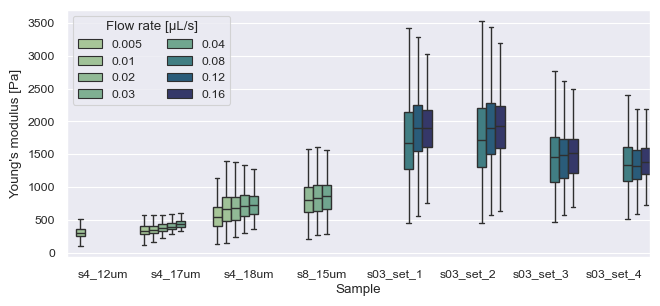

In [11]:
fsize = fsize_cm(17, 8)
fig, ax = plt.subplots(1, 1, figsize=fsize)

sns.boxplot(data=df_ch, x='sample', y='Emodulus [Pa]',
            order=['s4_12um', 's4_17um', 's4_18um', 's8_15um', 
                   's03_set_1', 's03_set_2', 's03_set_3', 's03_set_4',],
            hue='flow_rate', palette='crest',
            showfliers=False, width=1, dodge=True,
            ax=ax, legend='full')

ax.set_xlabel("Sample")
ax.set_ylabel("Young's modulus [Pa]")
ax.legend(title="Flow rate [µL/s]", ncol=2)

plt.tight_layout()
plt.show()

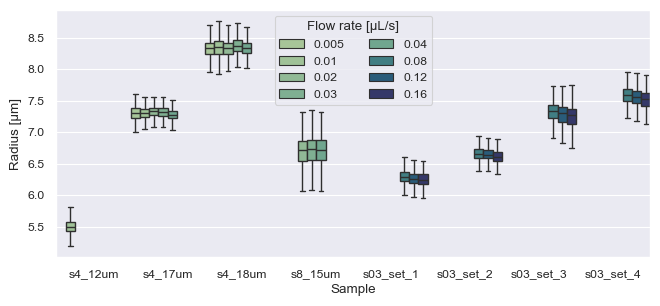

In [12]:
fsize = fsize_cm(17, 8)
fig, ax = plt.subplots(1, 1, figsize=fsize)

sns.boxplot(data=df_ch, x='sample', y='radius',
            order=['s4_12um', 's4_17um', 's4_18um', 's8_15um',
                   's03_set_1', 's03_set_2', 's03_set_3', 's03_set_4',],
            hue='flow_rate', palette='crest',
            showfliers=False, width=1, dodge=True,
            ax=ax, legend='full')

ax.set_xlabel("Sample")
ax.set_ylabel("Radius [µm]")
ax.legend(title="Flow rate [µL/s]", ncol=2)

plt.tight_layout()
plt.show()

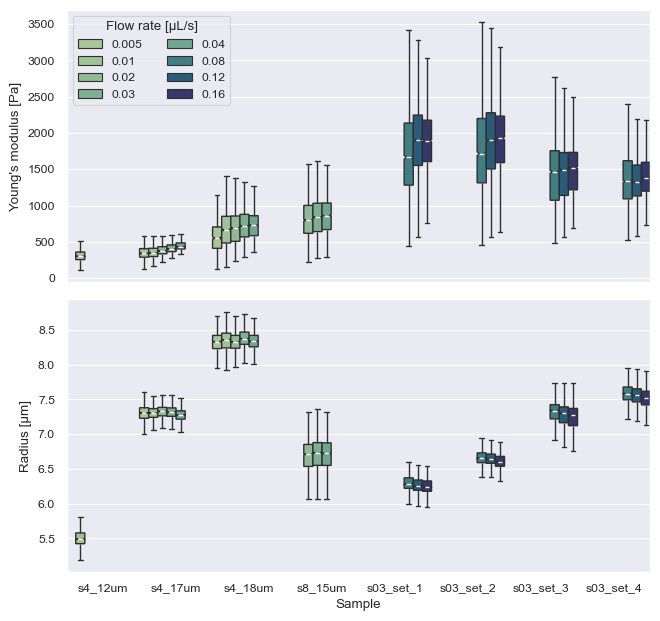

In [32]:
fsize = fsize_cm(17, 16)
fig, (ax1, ax2) = plt.subplots(2, 1, figsize=fsize, sharex=True)
mean_props =  {'markerfacecolor': 'w',
               'markeredgecolor': 'k',
               'marker': '*'}
median_props = {'color': 'w'}
sns.boxplot(data=df_ch, x='sample', y='Emodulus [Pa]',
            order=['s4_12um', 's4_17um', 's4_18um', 's8_15um',
                   's03_set_1', 's03_set_2', 's03_set_3', 's03_set_4',],
            hue='flow_rate', palette='crest',
            notch=True, showfliers=False, width=1, dodge=True,
            medianprops=median_props,
            # showmeans=True,
            # meanprops=mean_props,
            ax=ax1, legend='full')
# ax.set_xlabel("Sample")
ax1.set_ylabel("Young's modulus [Pa]")
ax1.legend(title="Flow rate [µL/s]", ncol=2)

sns.boxplot(data=df_ch, x='sample', y='radius',
            order=['s4_12um', 's4_17um', 's4_18um', 's8_15um',
                   's03_set_1', 's03_set_2', 's03_set_3', 's03_set_4',],
            hue='flow_rate', palette='crest',
            notch=True, showfliers=False, width=1, dodge=True,
            medianprops=median_props,
            ax=ax2, legend='full')
ax2.set_xlabel("Sample")
ax2.set_ylabel("Radius [µm]")
# ax2.legend(title="Flow rate [µL/s]", ncol=2)
ax2.legend_ = None

plt.tight_layout()
plt.show()

save_path = "..\\figure_plots\\SI\\fig_s1_emodulus_radius_beads.pdf"
fig.savefig(save_path, format='pdf', dpi=900,
            bbox_inches='tight', pad_inches=fsize[0] / 50
            )

## Get statistics

In [14]:
df_median = df_ch.groupby(by=['sample', 'flow_rate']).median()
df_std = df_ch.groupby(by=['sample', 'flow_rate']).std()
df_sem = df_ch.groupby(by=['sample', 'flow_rate']).sem()

In [15]:
df_median['Emodulus [Pa]']

sample     flow_rate
s03_set_1  0.080        1665.073621
           0.120        1898.940904
           0.160        1893.458101
s03_set_2  0.080        1714.133507
           0.120        1897.528950
           0.160        1926.463918
s03_set_3  0.080        1464.666568
           0.120        1493.569061
           0.160        1522.105254
s03_set_4  0.080        1332.215731
           0.120        1323.290332
           0.160        1384.568573
s4_12um    0.010         300.218366
s4_17um    0.005         340.025472
           0.010         347.776008
           0.020         372.722968
           0.030         399.116979
           0.040         434.156582
s4_18um    0.005         551.642132
           0.010         663.546168
           0.020         687.916620
           0.030         718.932537
           0.040         726.618631
s8_15um    0.020         798.451246
           0.030         837.952310
           0.040         860.855289
Name: Emodulus [Pa], dtype: float64

In [16]:
df_sem['Emodulus [Pa]']

sample     flow_rate
s03_set_1  0.080        13.787264
           0.120        11.677264
           0.160         9.415074
s03_set_2  0.080        14.055552
           0.120        11.755767
           0.160         9.683451
s03_set_3  0.080         9.125059
           0.120         7.427405
           0.160         6.640517
s03_set_4  0.080         7.780807
           0.120         6.009159
           0.160         5.417817
s4_12um    0.010         2.380827
s4_17um    0.005         3.601143
           0.010         3.856502
           0.020         2.508123
           0.030         1.666220
           0.040         1.507778
s4_18um    0.005         8.256338
           0.010        10.078417
           0.020         6.597397
           0.030         5.384113
           0.040         3.619337
s8_15um    0.020         7.785459
           0.030         6.455865
           0.040         5.122931
Name: Emodulus [Pa], dtype: float64

Mean of medians

In [17]:
df_median.groupby(by=['sample']).mean()['Emodulus [Pa]']

sample
s03_set_1    1819.157542
s03_set_2    1846.042125
s03_set_3    1493.446961
s03_set_4    1346.691545
s4_12um       300.218366
s4_17um       378.759602
s4_18um       669.731218
s8_15um       832.419615
Name: Emodulus [Pa], dtype: float64

Standard error of mean

In [18]:
df_median.groupby(by=['sample']).sem()['Emodulus [Pa]']

sample
s03_set_1    77.058217
s03_set_2    66.481127
s03_set_3    16.581233
s03_set_4    19.112976
s4_12um            NaN
s4_17um      17.291624
s4_18um      31.599797
s8_15um      18.225661
Name: Emodulus [Pa], dtype: float64

In [19]:
df_median.groupby(by=['sample']).mean()['radius']

sample
s03_set_1    6.256453
s03_set_2    6.633208
s03_set_3    7.304429
s03_set_4    7.554106
s4_12um      5.490570
s4_17um      7.305599
s4_18um      8.345617
s8_15um      6.722601
Name: radius, dtype: float64